## mnistを対象にした文字認識タスクにおいて
## 全結合層のみを使ったネットワークの層の深さが識別能力に与える影響の確認
2018.5.24 Yoshiki Watanabe

In [25]:
# 中間層が1層の全結合モデル


'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    print(input_shape)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    print(input_shape)

x_train = x_train.reshape((60000, img_cols * img_rows))
x_test = x_test.reshape((10000, img_cols * img_rows))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
# model.add(Dense(128, activation='relu',input_shape=(img_rows*img_cols,)))
model.add(Dense(num_classes, activation='softmax',input_shape=(img_rows*img_cols,)))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(28, 28, 1)
x_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.6582 - acc: 0.8369 - val_loss: 0.3661 - val_acc: 0.9023
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.3509 - acc: 0.9033 - val_loss: 0.3127 - val_acc: 0.9131
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3160 - acc: 0.9116 - val_loss: 0.2931 - val_acc: 0.9187
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.3008 - acc: 0.9161 - val_loss: 0.2858 - val_acc: 0.9222
Epoch 5/20
22528/60000 [==========>...................] - ETA: 1s - loss: 0.2838 - acc: 0.9200

60000/60000 [==============================] - 3s 45us/step - loss: 0.2916 - acc: 0.9184 - val_loss: 0.2831 - val_acc: 0.9206
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2854 - acc: 0.9205 - val_loss: 0.2773 - val_acc: 0.9239
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2804 - acc: 0.9221 - val_loss: 0.2738 - val_acc: 0.9231
Epoch 8/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2767 - acc: 0.9231 - val_loss: 0.2718 - val_acc: 0.9244
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2734 - acc: 0.9240 - val_loss: 0.2711 - val_acc: 0.9252
Epoch 10/20
19456/60000 [========>.....................] - ETA: 1s - loss: 0.2761 - acc: 0.9227

60000/60000 [==============================] - 3s 44us/step - loss: 0.2710 - acc: 0.9247 - val_loss: 0.2715 - val_acc: 0.9248
Epoch 11/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2687 - acc: 0.9260 - val_loss: 0.2690 - val_acc: 0.9254
Epoch 12/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2666 - acc: 0.9264 - val_loss: 0.2681 - val_acc: 0.9264
Epoch 13/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2645 - acc: 0.9265 - val_loss: 0.2685 - val_acc: 0.9237
Epoch 14/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2633 - acc: 0.9275 - val_loss: 0.2664 - val_acc: 0.9249
Epoch 15/20
21632/60000 [=========>....................] - ETA: 1s - loss: 0.2596 - acc: 0.9289

60000/60000 [==============================] - 3s 45us/step - loss: 0.2618 - acc: 0.9279 - val_loss: 0.2655 - val_acc: 0.9271
Epoch 16/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2605 - acc: 0.9279 - val_loss: 0.2652 - val_acc: 0.9271
Epoch 17/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2592 - acc: 0.9290 - val_loss: 0.2655 - val_acc: 0.9266
Epoch 18/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2583 - acc: 0.9291 - val_loss: 0.2647 - val_acc: 0.9259
Epoch 19/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2573 - acc: 0.9289 - val_loss: 0.2645 - val_acc: 0.9267
Epoch 20/20
19584/60000 [========>.....................] - ETA: 1s - loss: 0.2514 - acc: 0.9326

60000/60000 [==============================] - 3s 44us/step - loss: 0.2561 - acc: 0.9298 - val_loss: 0.2641 - val_acc: 0.9266
Test loss: 0.26410862248390915
Test accuracy: 0.9266


In [26]:
# 中間層が2層の全結合モデル

model2 = Sequential()
model2.add(Dense(128, activation='relu',input_shape=(img_rows*img_cols,)))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.3586 - acc: 0.9008 - val_loss: 0.2099 - val_acc: 0.9417
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1743 - acc: 0.9498 - val_loss: 0.1408 - val_acc: 0.9569
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1293 - acc: 0.9623 - val_loss: 0.1239 - val_acc: 0.9624
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1037 - acc: 0.9701 - val_loss: 0.1040 - val_acc: 0.9688
Epoch 5/20
29312/60000 [=============>................] - ETA: 1s - loss: 0.0846 - acc: 0.9755

60000/60000 [==============================] - 3s 53us/step - loss: 0.0862 - acc: 0.9754 - val_loss: 0.0956 - val_acc: 0.9712
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0736 - acc: 0.9786 - val_loss: 0.0842 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0642 - acc: 0.9816 - val_loss: 0.0833 - val_acc: 0.9741
Epoch 8/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0567 - acc: 0.9842 - val_loss: 0.0839 - val_acc: 0.9745
Epoch 9/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0503 - acc: 0.9859 - val_loss: 0.0753 - val_acc: 0.9772


Epoch 10/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0442 - acc: 0.9877 - val_loss: 0.0778 - val_acc: 0.9756
Epoch 11/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0400 - acc: 0.9894 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 12/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0360 - acc: 0.9901 - val_loss: 0.0700 - val_acc: 0.9771
Epoch 13/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0325 - acc: 0.9919 - val_loss: 0.0712 - val_acc: 0.9787
Epoch 14/20
50816/60000 [========================>.....] - ETA: 0s - loss: 0.0289 - acc: 0.9928

60000/60000 [==============================] - 3s 51us/step - loss: 0.0291 - acc: 0.9925 - val_loss: 0.0770 - val_acc: 0.9768
Epoch 15/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0262 - acc: 0.9937 - val_loss: 0.0727 - val_acc: 0.9780
Epoch 16/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0236 - acc: 0.9944 - val_loss: 0.0696 - val_acc: 0.9786
Epoch 17/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0217 - acc: 0.9952 - val_loss: 0.0676 - val_acc: 0.9796
Epoch 18/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0192 - acc: 0.9961 - val_loss: 0.0697 - val_acc: 0.9790
Epoch 19/20
 1280/60000 [..............................] - ETA: 2s - loss: 0.0126 - acc: 0.9984

60000/60000 [==============================] - 3s 51us/step - loss: 0.0173 - acc: 0.9963 - val_loss: 0.0704 - val_acc: 0.9790
Epoch 20/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0157 - acc: 0.9968 - val_loss: 0.0693 - val_acc: 0.9800


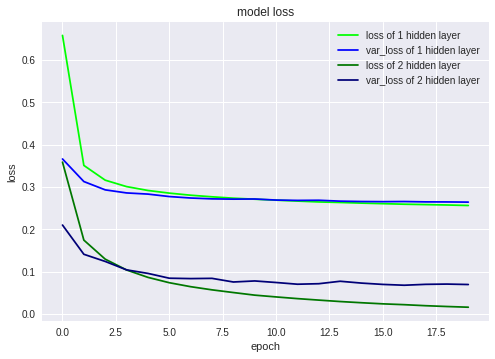

In [30]:
 # 層の深さが損失関数に与える影響をチェック
  
  plt.plot(history.history['loss'], color='#00ff00')
  plt.plot(history.history['val_loss'], color='#0000ff')
  plt.plot(history2.history['loss'], color='#007700')
  plt.plot(history2.history['val_loss'], color='#000077')
  plt.title('model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['loss of 1 hidden layer', 'var_loss of 1 hidden layer','loss of 2 hidden layer', 'var_loss of 2 hidden layer'], loc='upper right')
  plt.show()

# 学習履歴をプロット
# plot_history(history)

・縦軸は損失（低いほど良いモデル）、横軸はepoch（学習回数みたいな指標）

・中間層（隠れ層）の深さを変えて比較した

・どちらの場合も学習が収束している

・2層の場合テストセットでの損失は下がり続けているがバリデーションセットでの損失は収束している<br>→このネットワーク・最適化方法においては汎化能力の観点で収束している

・accuracyは1層で93% 2層で98%程度

・層が深いほうが損失が小さくなっている→モデルの表現能力の問題と考えられる
